### Opis algorytmu

Symulacja opiera się na pomyśle z artykułu autorstwa Nadav Kashtana oraz Alona Uri'ego "Spontaneous evolution of modularity and network motifs." *Proceedings of the National Academy of Sciences* 102.39 (2005): 13773-13778.

Symulujemy układ n bramek NAND, chcmy by wyewoluowały one w strukturę realizującą logikę XOR. Ponieważ, rozumiem XOR jako funkcję dwóch zmiennych, zawsze przyjmujemy dwa i tylko dwa wejścia sygnału, którymi odpowiednio przesłyana jest wartość 0 lub 1. Układ zakończony jest specjaną bramką wyjściową, wyjście z tej bramki jest interpretowane jako wynik działania algorytmu. Zatem ukłąd nie musi korzystać ze wszystkich bramek!

Podobnie jak auorzy oryginalnej pracy nie narzucaliśmy orgacznień na powstawanie pętli i bezsensowncyh połączeń.

#### Funkcja kosztu

Maksymalizowana funkcja kosztu obwodu **c** to:

$$
f(c) = \left\{
    \begin{array}{ll}
        f_v(c) = \lbrace{\frac{correct}{all} - | gates - optimal\_gates| \cdot gates\_penalty} \\
        f_i(c) = -1, 
    \end{array}
\right.
$$

$ f_v $ jest to koszt dla obdodu, dla którego da się ustlaić wartość wyjśćia. $ optimal\_gates $ to optymalna, czyli minimalna liczba bramek (5) potrzebna do stworzenia układu XOR, $gates$ to liczba bramek, realizowana przez układ, $gates\_penalty$ to kara za ilość bramek różną od optymalnej, domyślnie 0,2.


Jeżeli obwód zostaje utworzony w sposób, który uniemożlwiia obliczenie wartości wyjścia, wtedy przyznajemy takiemu obwodowi wartość $ {-1} $

Dodaliśmy karę za używanie innej liczby bramek niż optymalna, ponieważ algorytm miał problem w przypadku, gdy efektywna sieć skłądałą się wyłącznie z bramki wyjściowej połączonej bezpośrednio z wejściem A oraz B. Ponieważ, taki ukłąd realizuje bramkę NAND, która jest w 75% zgodna z XOR, to przy tak zadanej funkcji, algorytm miał tendencję do preferowania ukłądów ekspresjonujących funkcję NAND i nie był skłonny do dalszej eksploracji.

#### Działanie algorytmu

1. Inicjalizacja populacji obwodów
    1. Zainicjalizuj każdy z obwodów całkowicie losowymi połączeniami (dopuszczalne auto-dowiązania i pętle)
2. Pętla uczenia:
    1. Wyznacz fitness każdego z obowdów
    2. Usuń L% najgorszych obwodów
    3. Powiel L% najlepszych obwodów
    4. Zmutuj każdy z obwodów


Mutowanie: w obwodzie może wystąpić pojedyncza mutacja z prawdopodobieństwem p (domyślnie 0.7) lub brak mutacji. Mutacja może zmienić jedno połączenie między bramkami.

#### Case study działania

Poniżej działanie algorytmu dla populacji = 50, 1000 kroków i prawdopodobieńśtwa mutacji 70%

In [ ]:
import evolution
from evolution import Evolution, Simulation
import matplotlib.pyplot as plt
import importlib

def drawPlots(best_fitness, avg_fitness, epochs):
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.figure()
    plt.clf()
    fig, ax = plt.subplots(num=1)
    ax.plot(range(0, simulation.epochs), best_fitness, 'k-', label='Best', color='green')
    ax.plot(range(0, simulation.epochs), avg_fitness, 'k-', label='Average', color='blue')
    ax.legend(loc='best')

In [ ]:
evolution = Evolution()
evolution.nandGatesQuantity = 10
evolution.inputGatesQuantity = 2
evolution.populationQuantity = 50
evolution.elitesRatio = 0.2 #procent nie mutowanych najlepszych
evolution.overwritingRatio = 0.2 #procent nadpisywanych najgorszych
evolution.mutation_probability = 0.7 #szansa na mutację
evolution.gates_penalty = 0.2 #jak bardzo każemy za nieoptymalną liczbę bramek

simulation = Simulation()
simulation.epochs = 1000
best_fitness, avg_fitness = simulation.learn(evolution)

plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(range(0, simulation.epochs), best_fitness, 'k-', label='Best', color='green')
ax.plot(range(0, simulation.epochs), avg_fitness, 'k-', label='Average', color='blue')
ax.legend(loc='best')


Widzimy, że algorym sopniowo znajduje coraz lepsze układy. 

<b>Fitness < 0</b> Na początku mamy całkowicie losową sieć, występje sporo bezsensownych pętli, mało który bramki łączą się z wejściami! Najlepszy ukła to po prostu sieć zawierająca najprostszą bramkę NAND (taka prostota jest penalizowana przez f. kosztu)

<div>
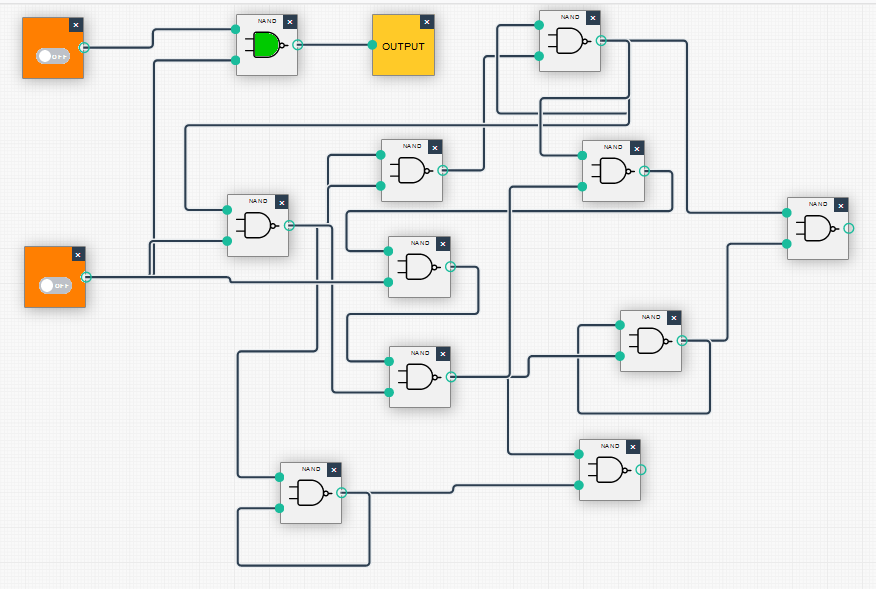
</div>   

<b>Fitness = 0.35</b> Widzimy, że po kilkudziesięciu krokach układ zaczyna preferować bardziej złożóne stany i tworzą się pierwsze podwaliny pod dlaszą ewolucję. Także, ponieważ f. kosztu preferuje optymalizowanie liczby bramek, widzimy, że część tych najbardziej bezsensownych jest usuwana na peryferia ukłądu i tworzy wyłączone wyspy
<div>
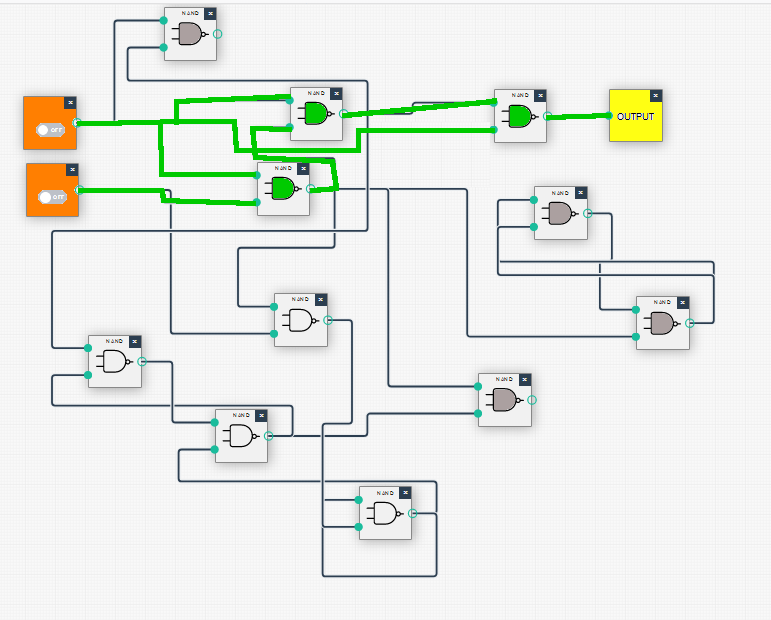
</div>  

<b>Fitness = 0.75</b>  Po ponad 100 krokach algorytm znajduje układ będący dobrym przyblizeniem opytmalnego rozwiązania. Bramki błędne są coraz bardziej separowane od istotnych części układu

<div>
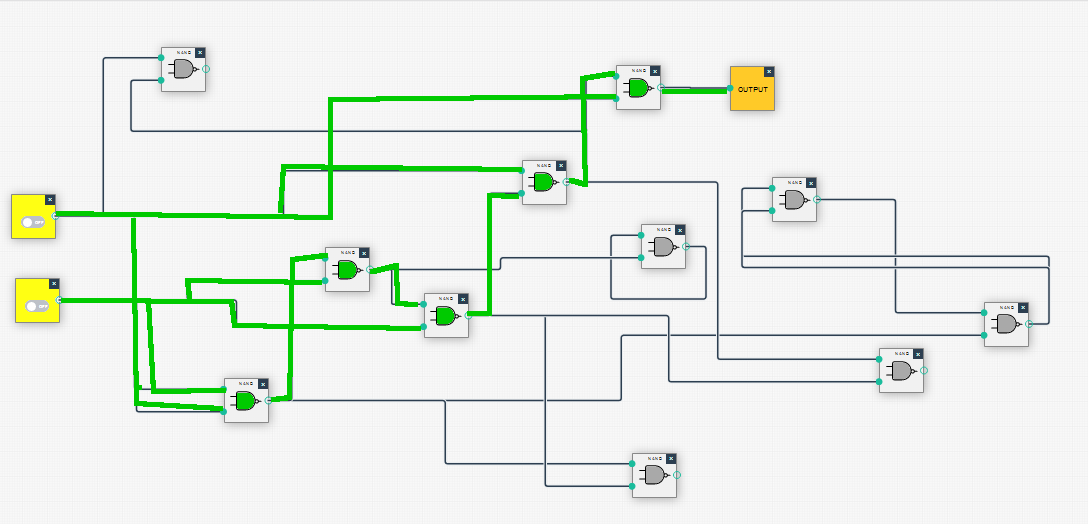
</div>   

    

<b>Fitness = 1!!!</b>  Ponieważ poprzedni układ był bardzo dobry, ciężko było przebić się kolejnym zmianom, więszkość mutacji, prawdopodbnie jedynie pogarszała model. Rówież ponieważ w czasie selekcji naturalnej najlepsze modele były kopioane w miejce najgorszych niełatwo było o przebicie się innowacji. Jednak w tym przebiegu algorytmu udało się i układ osiągnął przełamanie, a także podręcznikowe połączenie realizujące bramkę XOR

<div>
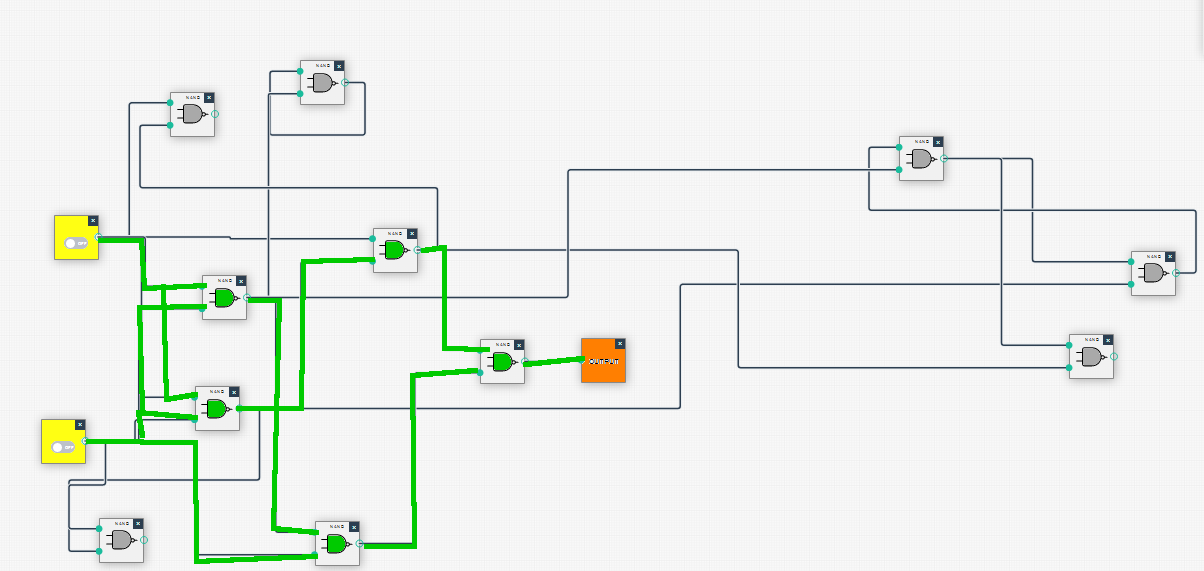
</div>  

#### Działanie bez kary za nieoptymalną liczbę bramek
W przypadku, gdy nie stosujemy kary za posiadanie za małej liczby bramek, układ zadowala się najprostszym rozwiązaniem, jakim jest utworzenie ordynarnej bramki NAND z imputów. Oczywiście ponieważ nasza funkcja najwyżej nagradza za 5 bramek, trzeba mieć świadmość, że biasuje ona algorytm do minimalizowania liczby używanych  bramek.

In [ ]:
import evolution

importlib.reload(evolution)

import evolution
from evolution import Evolution, Simulation

evolution = Evolution()
evolution.nandGatesQuantity = 10
evolution.inputGatesQuantity = 2
evolution.populationQuantity = 50
evolution.elitesRatio = 0.0 #procent nie mutowanych najlepszych
evolution.overwritingRatio = 0.2 #procent nadpisywanych najgorszych
evolution.mutation_probability = 0.7 #szansa na mutację
evolution.gates_penalty = 0.0 #jak bardzo każemy za nieoptymalną liczbę bramek


simulation = Simulation()
simulation.epochs = 1000
best_fitness, avg_fitness = simulation.learn(evolution)

drawPlots(best_fitness, avg_fitness, simulation.epochs)
plt.title("Brak kary za lenistwo")

#### Im output dalej od imputów tym trudniej o szybką zbieżność

Koljeną ciekawą obserwacją jest fakt, że im dalej leży output od imputów i im bardziej prowadzą do niego zawiłe połączenia tym trudniej jest przebić się algorytmowi z jakimkolwiek rozwiązaniem, by sieć mogła się w ogóle zewaluować. Prznajmniej dla niewielkich (50) poulacji

In [ ]:
import evolution

importlib.reload(evolution)

import evolution
from evolution import Evolution, Simulation

evolution = Evolution()
evolution.nandGatesQuantity = 10
evolution.inputGatesQuantity = 2
evolution.populationQuantity = 50
evolution.elitesRatio = 0.05 #procent nie mutowanych najlepszych
evolution.overwritingRatio = 0.2 #procent nadpisywanych najgorszych
evolution.mutation_probability = 0.7 #szansa na mutację
evolution.gates_penalty = 0.2 #jak bardzo każemy za nieoptymalną liczbę bramek


simulation = Simulation()
simulation.epochs = 1000
simulation.verbose = True
best_fitness, avg_fitness = simulation.learn(evolution)

drawPlots(best_fitness, avg_fitness, simulation.epochs)

Powyższy jednen z modeli początkowych, dla którego algorytm ma problem, by ruszyć:
<div>
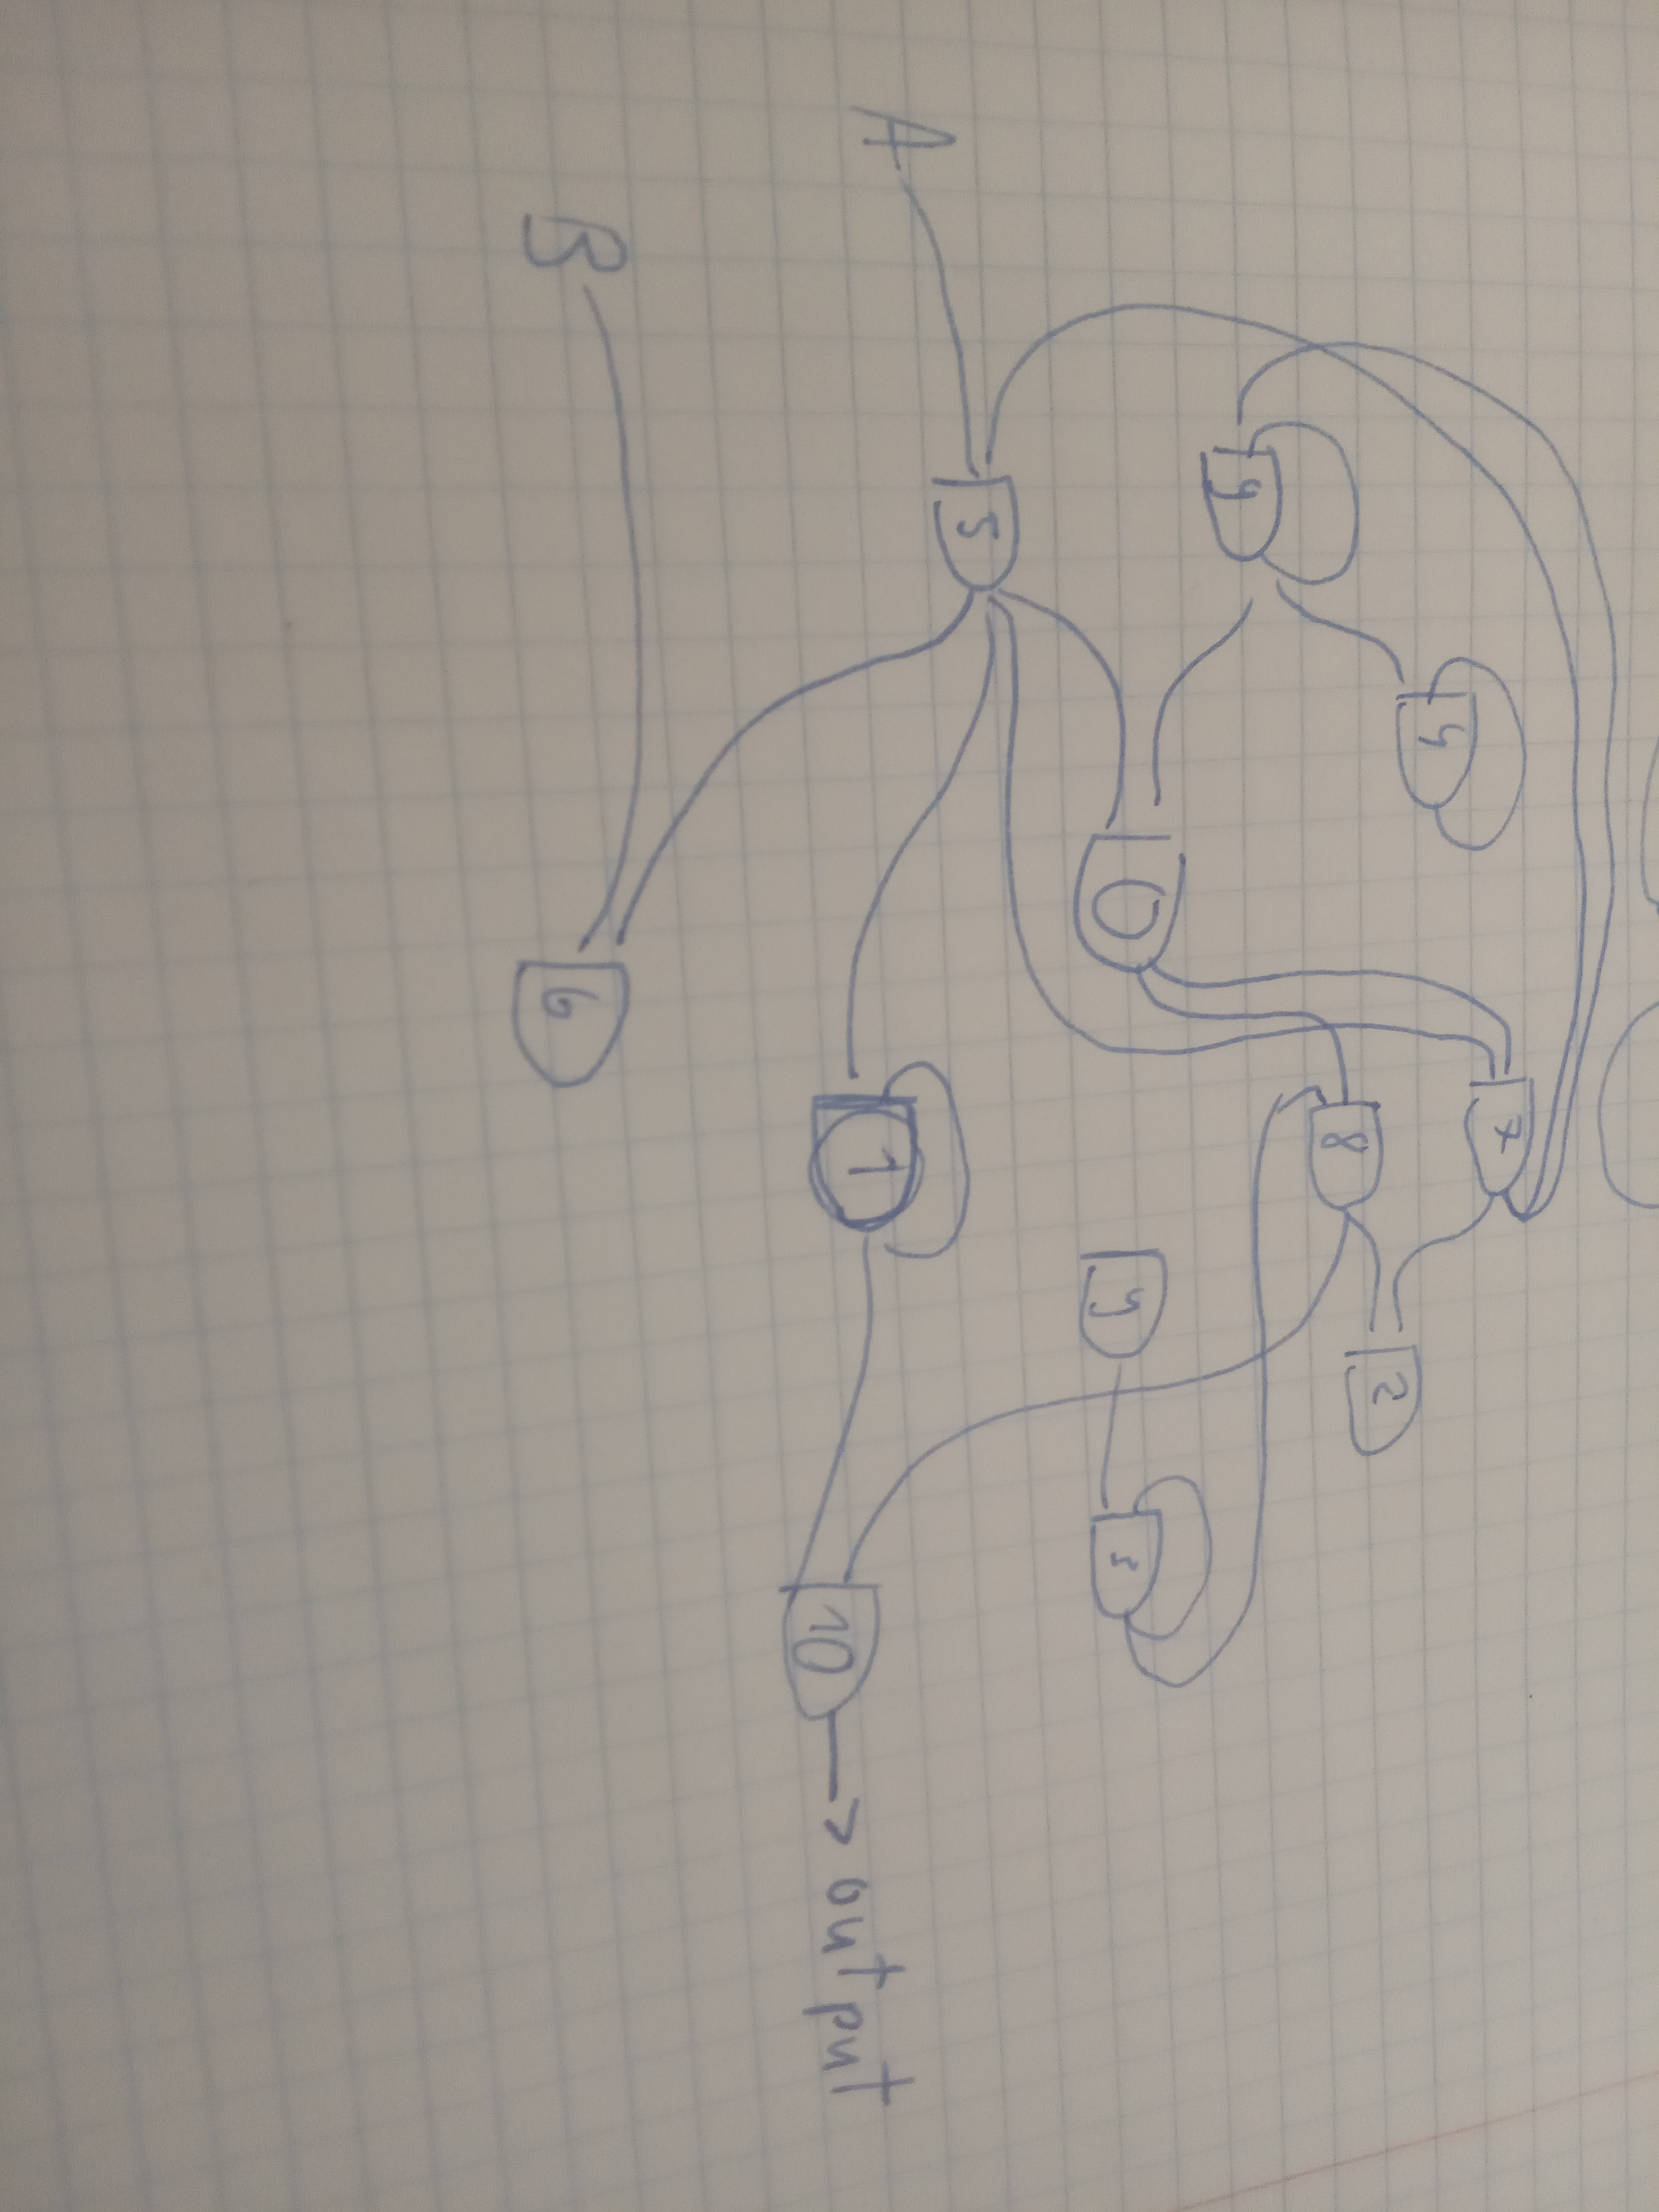
</div> 

#### Zbadanie wpływu populacji na wynik

Zbadano w jakim stopniu liczba populacji wpływna na znalezienie optymalnego rozwiązania, by dobrać odpowiednią próbkę, do testowania wpłwu ilości bramek na wyniki algorytmu. ZBadano zależność od populacji na trudniejszym rprzypadku 20 bramek.

In [ ]:
import evolution

importlib.reload(evolution)

from evolution import Evolution, Simulation

populations = [25, 50, 70, 100, 150, 200]

plt.figure()

for population in populations:
    plt.figure()
    plt.clf()
    fig, ax = plt.subplots(1, 3)
    for i in range(0,3):
        evolution = Evolution()
        evolution.nandGatesQuantity = 20
        evolution.inputGatesQuantity = 2
        evolution.populationQuantity = population
        evolution.elitesRatio = 0.1 #procent nie mutowanych najlepszych
        evolution.overwritingRatio = 0.3 #procent nadpisywanych najgorszych
        evolution.mutation_probability = 0.7 #szansa na mutację
        evolution.gates_penalty = 0.2 #jak bardzo każemy za nieoptymalną liczbę bramek


        simulation = Simulation()
        simulation.epochs = 1000
        best_fitness, avg_fitness = simulation.learn(evolution)

        
        ax[i].plot(range(0, simulation.epochs), best_fitness, 'k-', label='Best', color='green')
        ax[i].plot(range(0, simulation.epochs), avg_fitness, 'k-', label='Average', color='blue')
        ax[i].legend(loc='best')
        fig.suptitle(f"Population: {population}")
    
    plt.show()
    

Możemy zobserwować, że wielkość populacji znacznie przekłąda się na jakość wyniku i szybkość zbieżności. Po raz kolejny też widziny, że największym wyznawniem dla algorytmu jest wyjście z bezndziejnego ukłądu początkowego, w przypadku, gdy sieć nie chce się senswnie zewaluować.WYraźnie widać także breakthrough i jak ciężko jest modelowi wychodzić z optimów lokalnych

#### Zbadanie wpływu liczby bramek na ewolucję

Na koniec zbadane zostanie jak ilość bramek, przekłada się na uczenie modelu. Ponieważ poprzednie wyniki pokazały, że problem nie jest łatwy pod względem złożonosci użyjemy większych populacji i więskzej ilości liczby epok niż w porzednich eksperymentach.

Epoch: 900

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

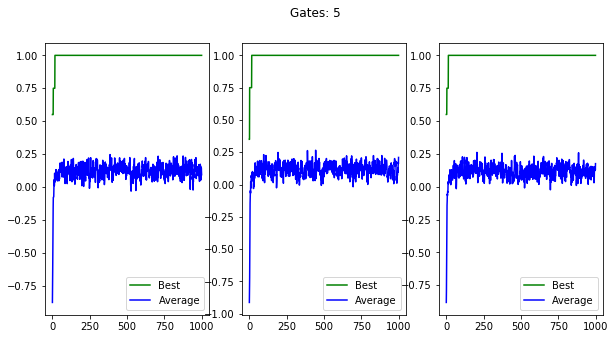

Epoch: 900

In [ ]:
import evolution

importlib.reload(evolution)

from evolution import Evolution, Simulation

gatess = [5, 10, 15, 25, 50]

plt.figure()

for gates in gatess:
    plt.figure()
    plt.clf()
    fig, ax = plt.subplots(1, 3)
    for i in range(0,3):
        evolution = Evolution()
        evolution.nandGatesQuantity = gates
        evolution.inputGatesQuantity = 2
        evolution.populationQuantity = 500
        evolution.elitesRatio = 0.005 #procent nie mutowanych najlepszych
        evolution.overwritingRatio = 0.3 #procent nadpisywanych najgorszych
        evolution.mutation_probability = 0.7 #szansa na mutację
        evolution.gates_penalty = 0.2 #jak bardzo każemy za nieoptymalną liczbę bramek


        simulation = Simulation()
        simulation.epochs = 1000
        best_fitness, avg_fitness = simulation.learn(evolution)

        
        ax[i].plot(range(0, simulation.epochs), best_fitness, 'k-', label='Best', color='green')
        ax[i].plot(range(0, simulation.epochs), avg_fitness, 'k-', label='Average', color='blue')
        ax[i].legend(loc='best')
        fig.suptitle(f"Gates: {gates}")
    
    plt.show()
    

#### Zbadanie wpływu liczby bramek na ewolucję raz jeszcze

Ale tym razem damy elites ratio na 0.3 co oznacza, że 30% najlepszych białek z epoki będzie kopiowanych i wsatianych w miejsce najgorszych oraz także, że oryginały nie zostną w danej epoce zmutowane. Innymi słowy przetestujemy czy ta metoda pozytywnej naturalnej selecji poprawi zbieżność algorytmu. Warto zwrócić wuagę, że w modelu porzpednim mieliśmy de facto wyłącznie mutacje, bez pozytywnego sprzężęnia zwrotnego.

In [ ]:
import evolution

importlib.reload(evolution)

from evolution import Evolution, Simulation

gatess = [5, 10, 15, 25, 50]

plt.figure()

for gates in gatess:
    plt.figure()
    plt.clf()
    fig, ax = plt.subplots(1, 3)
    for i in range(0,3):
        evolution = Evolution()
        evolution.nandGatesQuantity = gates
        evolution.inputGatesQuantity = 2
        evolution.populationQuantity = 500
        evolution.elitesRatio = 0.3 #procent nie mutowanych najlepszych
        evolution.overwritingRatio = 0.3 #procent nadpisywanych najgorszych
        evolution.mutation_probability = 0.7 #szansa na mutację
        evolution.gates_penalty = 0.2 #jak bardzo każemy za nieoptymalną liczbę bramek


        simulation = Simulation()
        simulation.epochs = 1000
        best_fitness, avg_fitness = simulation.learn(evolution)

        
        ax[i].plot(range(0, simulation.epochs), best_fitness, 'k-', label='Best', color='green')
        ax[i].plot(range(0, simulation.epochs), avg_fitness, 'k-', label='Average', color='blue')
        ax[i].legend(loc='best')
        fig.suptitle(f"Gates: {gates}")
    
    plt.show()

### Podsumowanie

* W modelach ewolucyjnych możemy zauważyć, że bardzo ważna jest ilość populacji na której zachodzi ewolucja, generalnie więszka populacja zwiększa możliwośći eksploracji przestrzeni rozwiązań. 
* Algorytmy ewolucyjne mają tendencje do znajdywania suboptymalnych rozwiązań, w których lubią dłużej pozostawać - im bliżej dobrego rozwiązania tym większa szansa na niekorzystne mutacje, w związku z czym ogromny wpływ na jakość algorytmu ma dobranie funkcji koszu oraz ewentualnych kar, za poszukiwanie innych rozwiązań, które mogą jednakże prowadzić do etapów przejściowych cechujących się pogorszonym fitnessem
* Jak można było przypszczać, widznimy także, że im problem jest tudniejszy tym cięższe staje się przeszukiwanie przestrzeni rozwiązań i spowalnia to ewolucję